In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True, precision=4)

dataset     = load_iris()
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

🤖: Dataset contains 150 points in 4-dimensional space


In [130]:
print('🌘 Mean value over each dimension before the normalization',np.mean(A, axis = 0))
# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)
print('🌗 Mean value over each dimension after the normalization',np.mean(A_std, axis = 0))

🌘 Mean value over each dimension before the normalization [5.8433 3.0573 3.758  1.1993]
🌗 Mean value over each dimension after the normalization [-0. -0. -0. -0.]


In [131]:
# Main part
u,s,wh = np.linalg.svd(A_std)
print('🤖Shapes: \n A_std, {}\n u {}\n s {}. Singular values in descending order {} \n wh {}'.format(A_std.shape, u.shape, s.shape,s, wh.shape))

🤖Shapes: 
 A_std, (150, 4)
 u (150, 150)
 s (4,). Singular values in descending order [20.9231 11.7092  4.6919  1.7627] 
 wh (4, 4)


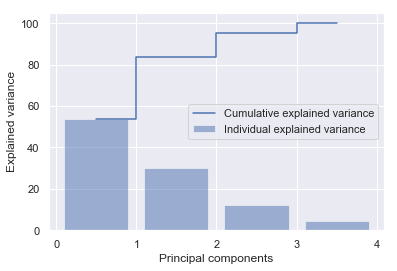

In [133]:
total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

xs = [0.5 + i for i in range(A_std.shape[1])]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(np.arange(A_std.shape[1]+1))
plt.show()

In [135]:
# Building projection matrix
rank = 2
w = wh.T
projections = u[:,:rank] @ np.diag(s[:rank])

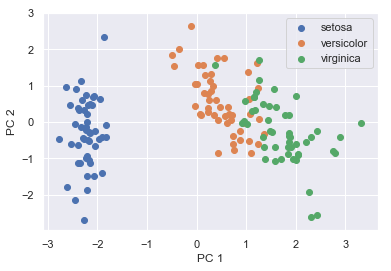

In [136]:
for label in classes:
    plt.scatter(projections[label_names == label, 0],
                projections[label_names == label, 1],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
# plt.show()
plt.savefig('pca_pr_iris.svg')

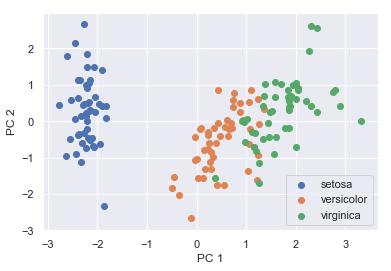

In [120]:
# Built-in approach
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
projections_sklearn = sklearn_pca.fit_transform(A_std)

for label in classes:
    plt.scatter(projections_sklearn[label_names == label, 0],
                projections_sklearn[label_names == label, 1],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

In [121]:
# Time comparison
def svd_projections(A_std):
    u,s,wh = np.linalg.svd(A_std)
    rank = 2
    w = wh.T
    return u[:,:rank] @ np.diag(s[:rank])

print('SVD PCA running time')
%timeit svd_projections
print('sklearn PCA running time')
%timeit sklearn_pca.fit_transform

SVD PCA running time
19 ns ± 0.243 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
sklearn PCA running time
42.7 ns ± 0.0386 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


🤖: Dataset contains 178 points in 13-dimensional space


<IPython.core.display.Javascript object>


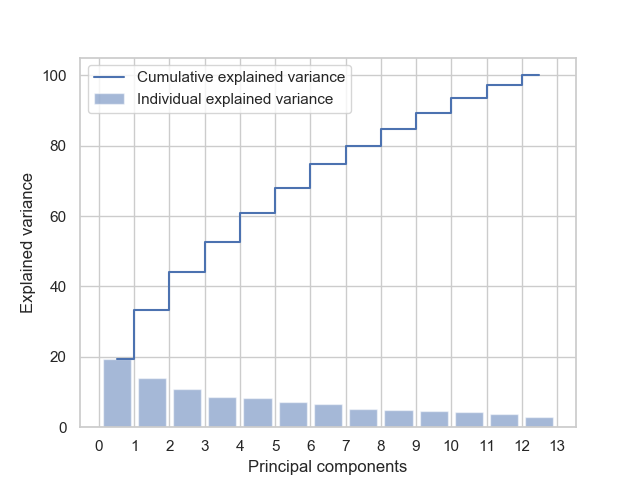

<IPython.core.display.Javascript object>


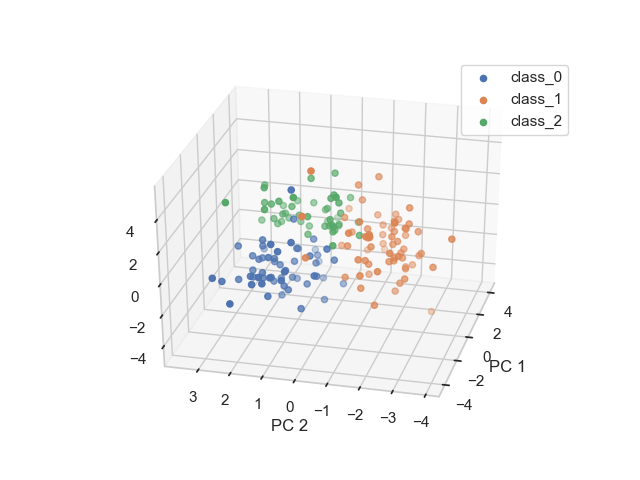

In [158]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.datasets import load_wine #lol
from sklearn.preprocessing import StandardScaler

dataset     = load_wine()
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u,s,wh = np.linalg.svd(A_std)

total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)


xs = [0.5 + i for i in range(A_std.shape[1])]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(np.arange(A_std.shape[1]+1))
plt.show()

sns.set_style("whitegrid")
plt.figure()
rank = 3
projections = u[:,:rank] @ np.diag(s[:rank])
ax = plt.axes(projection="3d")
for label in classes:
    ax.scatter3D(projections[label_names == label, 0],
                projections[label_names == label, 1],
                projections[label_names == label, 2],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.zlabel('PC 3')
plt.legend(loc='best')
plt.show()

🤖: Dataset contains 1797 points in 64-dimensional space


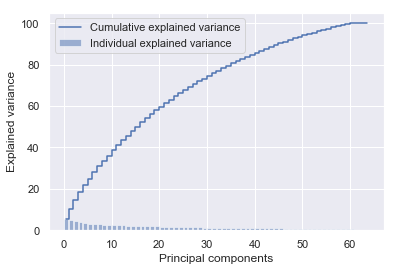

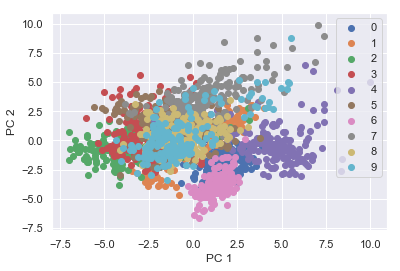

In [160]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sns.set()

from sklearn.datasets import load_digits #lol
from sklearn.preprocessing import StandardScaler

dataset     = load_digits()
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u,s,wh = np.linalg.svd(A_std)

total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)


xs = [0.5 + i for i in range(A_std.shape[1])]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
# plt.xticks(np.arange(A_std.shape[1]+1))
plt.show()

rank = 2
projections = u[:,:rank] @ np.diag(s[:rank])

for label in classes:
    plt.scatter(projections[label_names == label, 0],
                projections[label_names == label, 1],
                label = label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()